<a href="https://colab.research.google.com/github/ridvanyigit/Optimization-Methods/blob/main/Fibonacci_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fibonacci Search Method

**Description:**

The Fibonacci Search Method is an optimization technique used to find the minimum or maximum value of single-variable, unimodal functions. This method progressively narrows the search interval to approach the optimal point. The interval reduction ratio in each iteration is based on Fibonacci numbers. This provides a systematic approach to finding the optimal point.

**Algorithm:**

1.  **Initialization:**
    *   Function to be optimized: $f(x)$
    *   Search interval: $[a, b]$
    *   Number of iterations: $N$
    *   Fibonacci numbers: $F_0 = 0, F_1 = 1, F_k = F_{k-1} + F_{k-2}$

2.  **Calculation of Fibonacci Numbers:**
    *   Calculate Fibonacci numbers up to the $N+2$-th Fibonacci number ($F_{N+2}$).

3.  **Point Calculation:**
    *   Determine two points within the search interval:
        *   $x_1 = a + \frac{F_{N}}{F_{N+2}} (b - a)$
        *   $x_2 = a + \frac{F_{N+1}}{F_{N+2}} (b - a)$

4.  **Comparison and Interval Update:**
    *   If $f(x_1) > f(x_2)$: This indicates that the minimum point is more likely to be in the interval $[x_1, b]$. Therefore:
        *   $a = x_1$ (Update the left boundary of the search interval)
    *   Otherwise (if $f(x_1) \le f(x_2)$): The minimum point is more likely to be in the interval $[a, x_2]$. Therefore:
        *   $b = x_2$ (Update the right boundary of the search interval)

5.  **Stopping Criterion:**
    *   The algorithm stops if the specified number of iterations ($N$) has been reached or if a stopping criterion is met (e.g., the difference between function values falls below a tolerance value).
    *   Otherwise, decrement $N$ by one and return to step 3 to continue the iterations.  ($N \leftarrow N - 1$)

6.  **Result:**
    *   The final search interval $[a, b]$ is obtained. The midpoint of this interval is the closest estimate to the optimal point:
        *   $x_{opt} \approx \frac{a + b}{2}$

**Summary of Mathematical Formulation:**

\begin{align*}
\text{Fibonacci Numbers: } F_0 &= 0, \quad F_1 = 1, \quad F_k = F_{k-1} + F_{k-2} \\
\text{Calculation of Search Points: } \\
x_1 &= a + \frac{F_{N}}{F_{N+2}} (b - a) \\
x_2 &= a + \frac{F_{N+1}}{F_{N+2}} (b - a) \\
\text{Interval Update Rules:} \\
\text{If } f(x_1) > f(x_2) \text{ then: } \quad a &\leftarrow x_1 \\
\text{Otherwise: } \quad b &\leftarrow x_2 \\
\text{Optimal Point Estimate: } \quad x_{opt} &\approx \frac{a + b}{2}
\end{align*}

## 2. Explanations

### Fibonacci Search ($f, a, b, tolerance, max\_iterations$) Function:

*   $f$: The function to be optimized.
*   $a$: The left boundary of the search interval.
*   $b$: The right boundary of the search interval.
*   $tolerance$: Tolerance value for the stopping criterion (optional).
*   $max\_iterations$: The maximum number of iterations (specified as 5).
*   `fibonacci_numbers`: A function that calculates the first $N+2$ Fibonacci numbers, or a pre-calculated list.
*   `iteration_results`: A list to store the values obtained in each iteration.

### for loop:

Performs the iterations.

*   $x_1$ and $x_2$ are calculated based on the ratios derived from Fibonacci numbers.
*   $f(x_1)$ and $f(x_2)$ are compared, and the search interval is updated.
*   Iteration results are added to the `iteration_results` list.
*   Stopping Criterion: The loop ends when the difference between the function values falls below the tolerance (optional).

The final search interval (a, b) is returned.

### `objective_function` $(x)$ function:

Defines the function to be optimized.

### Initial Values:

*   $a$, $b$: The initial boundaries of the search interval.
*   $tolerance$: Tolerance value for the stopping criterion.
*   $max\_iterations$: The maximum number of iterations (5).

### Printing Results:

*   The final search interval [a5, b5] is printed.
*   The values $a$, $b$, $x_1$, $x_2$, $f(x_1)$, $f(x_2)$ obtained in each iteration are printed.

## 3. How It Works?

The Fibonacci Search Method uses Fibonacci numbers to narrow the search interval in each iteration. In each iteration, two points ($x_1$ and $x_2$) within the interval are selected according to the ratios derived from Fibonacci numbers, and the function values at these points are compared. The interval containing the point with the higher function value is discarded, and the search interval is narrowed. This is similar to the golden section method, but the interval reduction ratio is based on Fibonacci numbers.

$$f(x) = x^4 - 14x^3 + 60x^2 - 70x$$
Iteration: 5

In [ ]:
# @title 1st Way
import numpy as np

def fibonacci_search(f, a, b, max_iter=5):
    """Applies the Fibonacci search algorithm and stores the intervals at each iteration."""

    # Calculate Fibonacci numbers (up to N+2)
    fibonacci_numbers = [0, 1]
    for i in range(2, max_iter + 3):
        fibonacci_numbers.append(fibonacci_numbers[i-1] + fibonacci_numbers[i-2])

    intervals = []  # List to store the intervals

    for i in range(max_iter):
        n = max_iter - 1 - i

        c = a + (fibonacci_numbers[n+1] / fibonacci_numbers[max_iter + 1]) * (b - a)
        d = a + (fibonacci_numbers[n+2] / fibonacci_numbers[max_iter + 1]) * (b - a)

        if f(c) < f(d):
            b = d
        else:
            a = c

        intervals.append((a, b))

    return a, b, intervals

def objective_function(x):
    """Sample function to be optimized."""
    return x**4 - 14*x**3 + 60*x**2 - 70*x

a = -3  # Left boundary of the initial interval
b = 5   # Right boundary of the initial interval
max_iter = 5  # Maximum number of iterations

a_final, b_final, intervals = fibonacci_search(objective_function, a, b, max_iter)

# Construct the Output String
output = "Fibonacci Search Results:\n"
output += f"  a (final): {a_final:.6f}\n"
output += f"  b (final): {b_final:.6f}\n"
output += "\nIteration Intervals:\n"
for i, (a_val, b_val) in enumerate(intervals):
    output += f"  Iteration {i+1}: [{a_val:.6f}, {b_val:.6f}]\n"

# Estimated Minimum Point (Midpoint of the Interval)
minimum_x = (a_final + b_final) / 2
minimum_f = objective_function(minimum_x)

output += f"\nEstimated Minimum Point (x): {minimum_x:.6f}\n"
output += f"Estimated Minimum Value (f(x)): {minimum_f:.6f}\n"

print(output)

Fibonacci Search Results:
  a (final): -0.871094
  b (final): 2.000000

Iteration Intervals:
  Iteration 1: [-3.000000, 5.000000]
  Iteration 2: [-3.000000, 2.000000]
  Iteration 3: [-1.750000, 2.000000]
  Iteration 4: [-1.281250, 2.000000]
  Iteration 5: [-0.871094, 2.000000]

Estimated Minimum Point (x): 0.564453
Estimated Minimum Value (f(x)): -22.811513



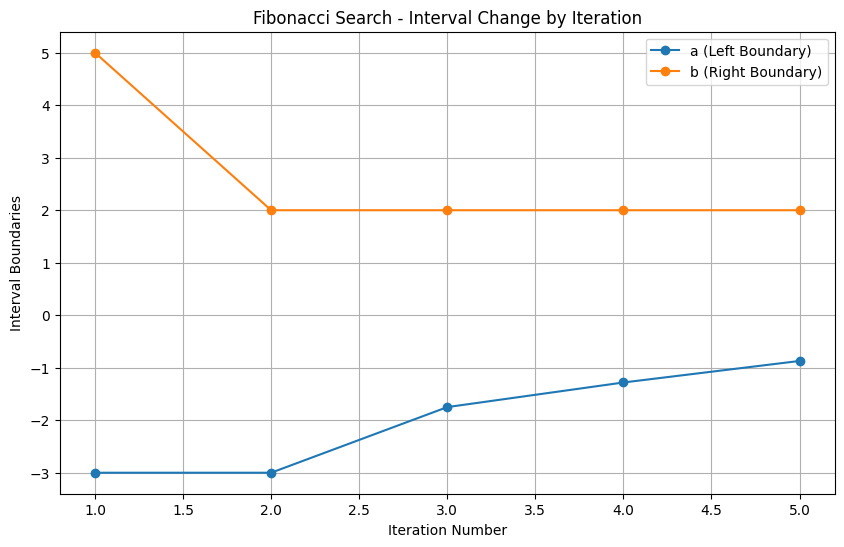

In [ ]:
# @title Fibonacci Search Algorithm - `Interval Reduction` Visualization
import matplotlib.pyplot as plt

# Create the plot
iteration_numbers = range(1, len(intervals) + 1)
a_values = [interval[0] for interval in intervals]
b_values = [interval[1] for interval in intervals]

plt.figure(figsize=(10, 6))
plt.plot(iteration_numbers, a_values, marker='o', label='a (Left Boundary)')
plt.plot(iteration_numbers, b_values, marker='o', label='b (Right Boundary)')
plt.xlabel('Iteration Number')
plt.ylabel('Interval Boundaries')
plt.title('Fibonacci Search - Interval Change by Iteration')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# @title 2nd Way
import numpy as np
from scipy.optimize import minimize_scalar, OptimizeResult

def fibonacci_search_method(func, bracket, **kwargs):
    """Custom Fibonacci search method for SciPy minimize_scalar."""

    a, b = bracket  # Initial interval
    max_iter = kwargs.get('maxiter', 5)  # Maximum number of iterations (default 5)

    # Calculate Fibonacci numbers (up to N+2)
    fibonacci_numbers = [0, 1]
    for i in range(2, max_iter + 3):
        fibonacci_numbers.append(fibonacci_numbers[i-1] + fibonacci_numbers[i-2])

    for i in range(max_iter):
        n = max_iter - 1 - i

        c = a + (fibonacci_numbers[n+1] / fibonacci_numbers[max_iter + 1]) * (b - a)
        d = a + (fibonacci_numbers[n+2] / fibonacci_numbers[max_iter + 1]) * (b - a)

        if func(c) < func(d):
            b = d
        else:
            a = c

    # Return the midpoint of the final interval as the estimate
    xmin = (a + b) / 2
    fmin = func(xmin)

    # Create the OptimizeResult object that SciPy expects
    result = OptimizeResult(x=xmin, fun=fmin, nit=max_iter, success=True)
    return result

def objective_function(x):
    """Sample function to be optimized."""
    return x**4 - 14*x**3 + 60*x**2 - 70*x

# Initial Values
a = -3
b = 5

# Optimization with SciPy (Using Custom Method)
result = minimize_scalar(objective_function,
                         bracket=(a, b),
                         method=fibonacci_search_method,
                         options={'maxiter': 5})  # Set the number of iterations

# Print Results
print("Optimization Results (SciPy - Fibonacci):")
print(result)  # Prints all results
print("\nMinimum Value (x):", result.x)
print("Function Value (at minimum):", result.fun)

Optimization Results (SciPy - Fibonacci):
 success: True
     fun: -22.811512945205322
       x: 0.564453125
     nit: 5

Minimum Value (x): 0.564453125
Function Value (at minimum): -22.811512945205322


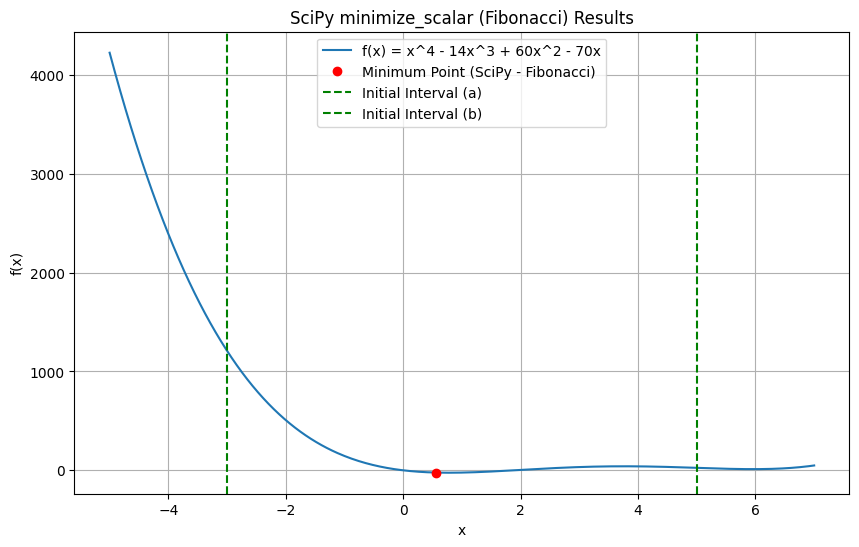

In [ ]:
# @title Optimization Results - `Function Graph & Optimal Solution`
import numpy as np
import matplotlib.pyplot as plt

# Plotting the Function Graph
x = np.linspace(-5, 7, 400)  # Values for the x-axis (extended the range)
y = objective_function(x)      # Function values

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = x^4 - 14x^3 + 60x^2 - 70x')

# Marking the Minimum Point
plt.plot(result.x, result.fun, 'ro', label='Minimum Point (SciPy - Fibonacci)')  # Red dot

# Showing the Initial Intervals
plt.axvline(x=a, color='g', linestyle='--', label='Initial Interval (a)')
plt.axvline(x=b, color='g', linestyle='--', label='Initial Interval (b)')


# Labels and Title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('SciPy minimize_scalar (Fibonacci) Results')
plt.grid(True)
plt.legend()
plt.show()